In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('csse_daily.csv',sep=',')
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [4]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3131.000000,3739.000000,3739.000000,3813.000000,3813.000000,3.813000e+03,3809.000000,3739.000000,3762.000000
mean,31359.889812,36.215246,-72.370231,3385.879098,149.259900,1.866498e+03,1383.469415,598.593082,3.439586
std,16985.179864,12.761754,53.459971,17225.415049,1147.628693,1.986030e+04,18131.156162,796.913032,44.140338
min,66.000000,-52.368000,-174.159600,0.000000,0.000000,0.000000e+00,-960967.000000,0.000000,0.000000
25%,19008.000000,33.606456,-96.534476,35.000000,0.000000,0.000000e+00,28.000000,149.010639,0.000000
50%,29199.000000,38.004509,-87.268034,158.000000,3.000000,0.000000e+00,128.000000,348.432056,1.412590
75%,46050.000000,42.133698,-78.470590,923.000000,22.000000,0.000000e+00,615.000000,757.823037,3.894841
max,99999.000000,71.706900,178.065000,371997.000000,40234.000000,1.006326e+06,209276.000000,13381.779511,2700.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 14 columns):
FIPS                   3131 non-null float64
Admin2                 3135 non-null object
Province_State         3644 non-null object
Country_Region         3813 non-null object
Last_Update            3813 non-null object
Lat                    3739 non-null float64
Long_                  3739 non-null float64
Confirmed              3813 non-null int64
Deaths                 3813 non-null int64
Recovered              3813 non-null int64
Active                 3809 non-null float64
Combined_Key           3813 non-null object
Incidence_Rate         3739 non-null float64
Case-Fatality_Ratio    3762 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 417.1+ KB


In [6]:
df.dtypes

FIPS                   float64
Admin2                  object
Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered                int64
Active                 float64
Combined_Key            object
Incidence_Rate         float64
Case-Fatality_Ratio    float64
dtype: object

In [7]:
df.isnull().values.any()

True

In [8]:
#show columns
for i,col in enumerate(df.columns):
    print(i+1,". column is ",col)

1 . column is  FIPS
2 . column is  Admin2
3 . column is  Province_State
4 . column is  Country_Region
5 . column is  Last_Update
6 . column is  Lat
7 . column is  Long_
8 . column is  Confirmed
9 . column is  Deaths
10 . column is  Recovered
11 . column is  Active
12 . column is  Combined_Key
13 . column is  Incidence_Rate
14 . column is  Case-Fatality_Ratio


In [9]:
df.sample(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3416,NaN,NaN,Morelos,Mexico,2020-07-13 04:43:04,18.681300,-99.101300,3360,744,2442,174.0,"Morelos, Mexico",164.378897,22.142857
3714,NaN,NaN,NaN,Indonesia,2020-07-13 04:43:04,-0.789300,113.921300,75699,3606,35638,36455.0,Indonesia,27.675489,4.763603
1499,2150.0,Kodiak Island,Alaska,US,2020-07-13 04:43:04,57.655294,-153.749358,5,0,0,5.0,"Kodiak Island, Alaska, US",38.467457,0.000000
1867,8077.0,Mesa,Colorado,US,2020-07-13 04:43:04,39.017879,-108.469799,142,0,0,142.0,"Mesa, Colorado, US",92.082226,0.000000
1107,46053.0,Gregory,South Dakota,US,2020-07-13 04:43:04,43.194191,-99.188839,5,0,0,5.0,"Gregory, South Dakota, US",119.474313,0.000000
1466,26083.0,Keweenaw,Michigan,US,2020-07-13 04:43:04,47.631977,-88.414343,1,0,0,1.0,"Keweenaw, Michigan, US",47.258979,0.000000
2578,35053.0,Socorro,New Mexico,US,2020-07-13 04:43:04,34.007155,-106.929835,64,5,0,59.0,"Socorro, New Mexico, US",384.684739,7.812500
70,26009.0,Antrim,Michigan,US,2020-07-13 04:43:04,44.996902,-85.155031,25,0,0,25.0,"Antrim, Michigan, US",107.185731,0.000000
3628,NaN,NaN,Yamagata,Japan,2020-07-13 04:43:04,38.448396,140.102154,72,1,68,3.0,"Yamagata, Japan",6.681105,1.388889
2557,27143.0,Sibley,Minnesota,US,2020-07-13 04:43:04,44.579659,-94.231649,58,2,0,56.0,"Sibley, Minnesota, US",390.178271,3.448276


In [10]:
#show the values types
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())


---- FIPS ---
37107.0    1
90042.0    1
5037.0     1
51029.0    1
37103.0    1
51127.0    1
26043.0    1
38063.0    1
17173.0    1
13281.0    1
20149.0    1
38027.0    1
31049.0    1
48025.0    1
1069.0     1
13013.0    1
36007.0    1
18043.0    1
12015.0    1
41027.0    1
46057.0    1
38073.0    1
29105.0    1
12113.0    1
48097.0    1
21127.0    1
20089.0    1
29059.0    1
38095.0    1
37133.0    1
          ..
13129.0    1
37163.0    1
39085.0    1
39171.0    1
48441.0    1
51678.0    1
18005.0    1
45031.0    1
12079.0    1
46051.0    1
31031.0    1
36061.0    1
37109.0    1
29035.0    1
13215.0    1
26053.0    1
27129.0    1
48273.0    1
5075.0     1
20155.0    1
48043.0    1
47007.0    1
36013.0    1
20049.0    1
16045.0    1
35061.0    1
55061.0    1
53075.0    1
37193.0    1
2016.0     1
Name: FIPS, Length: 3131, dtype: int64
---- Admin2 ---
Unassigned          49
Washington          30
Jefferson           26
Franklin            25
Lincoln             24
Jackson             24


In [11]:
df= df.drop(['FIPS', 'Admin2'], axis=1)
# df.drop(df.columns[[0,1,3]], axis=1, inplace=True)

In [12]:
df.isna().sum()

Province_State         169
Country_Region           0
Last_Update              0
Lat                     74
Long_                   74
Confirmed                0
Deaths                   0
Recovered                0
Active                   4
Combined_Key             0
Incidence_Rate          74
Case-Fatality_Ratio     51
dtype: int64

In [34]:
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [14]:
x=[]
x.append(df['Confirmed'].sum())
x.append(df['Deaths'].sum())
x.append(df['Recovered'].sum())
x.append(df['Active'].sum())


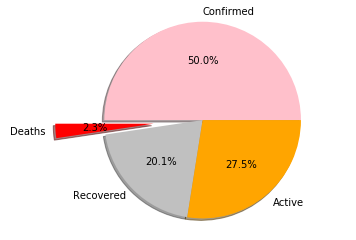

In [15]:
labels=['Confirmed','Deaths','Recovered','Active']
colors=['pink','red','silver','orange']
explode=[0,0.5,0,0]
values=[x[0],x[1],x[2],x[3]]
plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()


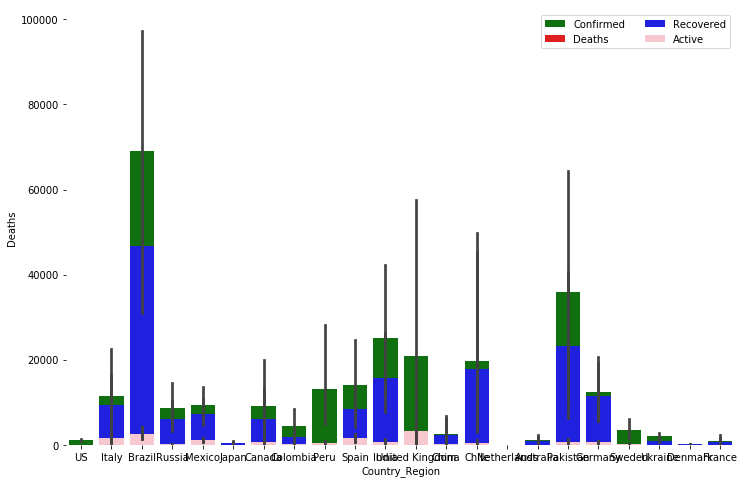

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(df['Country_Region'],df['Confirmed'],color="g",label="Confirmed")
sns.barplot(df['Country_Region'],df['Deaths'],color="r",label="Deaths")
sns.barplot(df['Country_Region'],df['Recovered'],color="b",label="Recovered")
sns.barplot(df['Country_Region'],df['Deaths'],color="pink",label="Active")
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

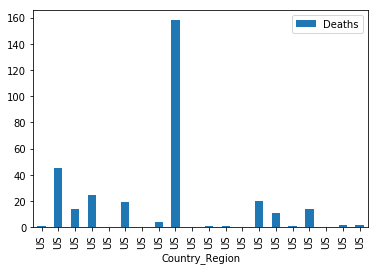

In [17]:
df.head(20).plot(kind='bar',x='Country_Region',y='Deaths')
plt.show()

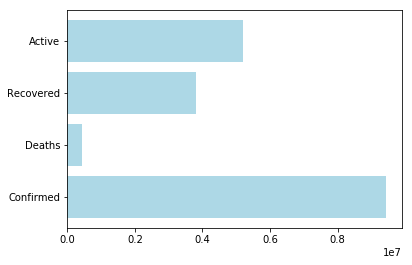

In [18]:
plt.barh(labels, values, color='lightblue')
plt.show()

In [40]:

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('07-12-2020.csv',sep=',')
df.dropna() 
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956


In [42]:
temp =df[(df.Last_Update == max(df.Last_Update)) ]

In [43]:
!pip install folium